In [ ]:
!python --version

Python 3.12.12


In [ ]:
!pip install tensorflow==2.18.0
!pip install git+https://github.com/tensorflow/addons.git

  Using cached ml_dtypes-0.4.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached ml_dtypes-0.4.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.3
    Uninstalling ml_dtypes-0.5.3:
      Successfully uninstalled ml_dtypes-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.4.1 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.18.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.18.0 which is incompatible.
tensorstore 0.1.78 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.4.1 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.2

In [ ]:
!pip install -U ml_dtypes

  Using cached ml_dtypes-0.5.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.9 kB)
Using cached ml_dtypes-0.5.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (4.9 MB)
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.3 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.18.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.18.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt
import os, cv2, glob, shutil, random
from tqdm.notebook import tqdm
from zipfile import ZipFile
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import files

print("✅ TensorFlow:", tf.__version__)
print("✅ TensorFlow Addons:", tfa.__version__)


/usr/local/lib/python3.12/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.18.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

✅ TensorFlow: 2.18.0
✅ TensorFlow Addons: 0.23.0-dev


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

  # Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

zip_path = "/content/brain-mri-images-for-brain-tumor-detection.zip"
extract_dir = "/content/brain_tumor_dataset"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset extracted to:", extract_dir)


✅ Dataset extracted to: /content/brain_tumor_dataset


In [ ]:
yes_dir = os.path.join(extract_dir, "yes")
no_dir = os.path.join(extract_dir, "no")

X, y = [], []
IMG_SIZE = (224, 224)
MAX_YES = 98  # To balance classes

print("📥 Loading 'yes' images...")
for i, file in enumerate(tqdm(os.listdir(yes_dir))):
    if i >= MAX_YES: break
    path = os.path.join(yes_dir, file)
    img = cv2.imread(path)
    if img is not None:
        img = cv2.resize(img, IMG_SIZE)
        X.append(img)
        y.append("Tumor")

print("📥 Loading 'no' images...")
for file in tqdm(os.listdir(no_dir)):
    path = os.path.join(no_dir, file)
    img = cv2.imread(path)
    if img is not None:
        img = cv2.resize(img, IMG_SIZE)
        X.append(img)
        y.append("No tumor")

X = np.array(X, dtype="float32") / 255.0  # ✅ scale between 0-1
y = np.array(y)
print(f"✅ Loaded {len(X)} images. Shape: {X.shape}")


📥 Loading 'yes' images...


  0%|          | 0/155 [00:00<?, ?it/s]

📥 Loading 'no' images...


  0%|          | 0/98 [00:00<?, ?it/s]

✅ Loaded 196 images. Shape: (196, 224, 224, 3)


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0=No tumor, 1=Tumor

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


Train: 123, Val: 14, Test: 59


In [ ]:
base_split_dir = "/content/brain_tumor_dataset_split"
label_dict = {0: "Normal", 1: "Tumor"}

# Create directories
for split in ["train", "val", "test"]:
    for cls in ["Normal", "Tumor"]:
        os.makedirs(os.path.join(base_split_dir, split, cls), exist_ok=True)

def save_split_images(X_data, y_data, split):
    print(f"📁 Saving {split} images...")
    for i in tqdm(range(len(X_data))):
        cls = label_dict[y_data[i]]
        img = (X_data[i] * 255).astype(np.uint8)  # convert back for saving
        img_pil = Image.fromarray(img)
        img_pil.save(os.path.join(base_split_dir, split, cls, f"{split}_{i}.jpg"))

save_split_images(X_train, y_train, "train")
save_split_images(X_val, y_val, "val")
save_split_images(X_test, y_test, "test")

print("✅ All splits saved to:", base_split_dir)


📁 Saving train images...


  0%|          | 0/123 [00:00<?, ?it/s]

📁 Saving val images...


  0%|          | 0/14 [00:00<?, ?it/s]

📁 Saving test images...


  0%|          | 0/59 [00:00<?, ?it/s]

✅ All splits saved to: /content/brain_tumor_dataset_split


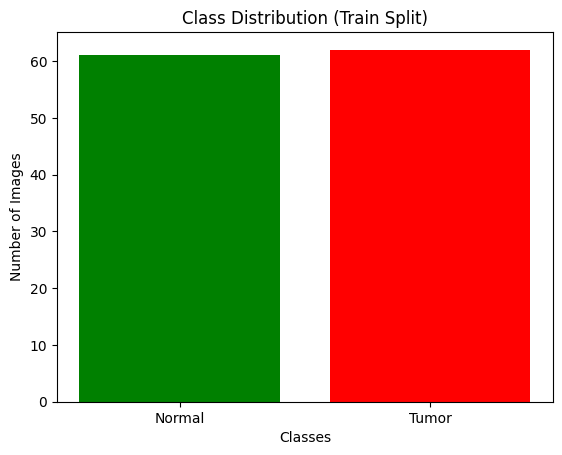

🟢 Normal images: 61
🔴 Tumor images:  62


In [ ]:
import glob
normal_files = glob.glob(f"{base_split_dir}/train/Normal/*.jpg")
tumor_files  = glob.glob(f"{base_split_dir}/train/Tumor/*.jpg")

plt.bar(["Normal", "Tumor"], [len(normal_files), len(tumor_files)], color=["green", "red"])
plt.title("Class Distribution (Train Split)")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

print(f"🟢 Normal images: {len(normal_files)}")
print(f"🔴 Tumor images:  {len(tumor_files)}")


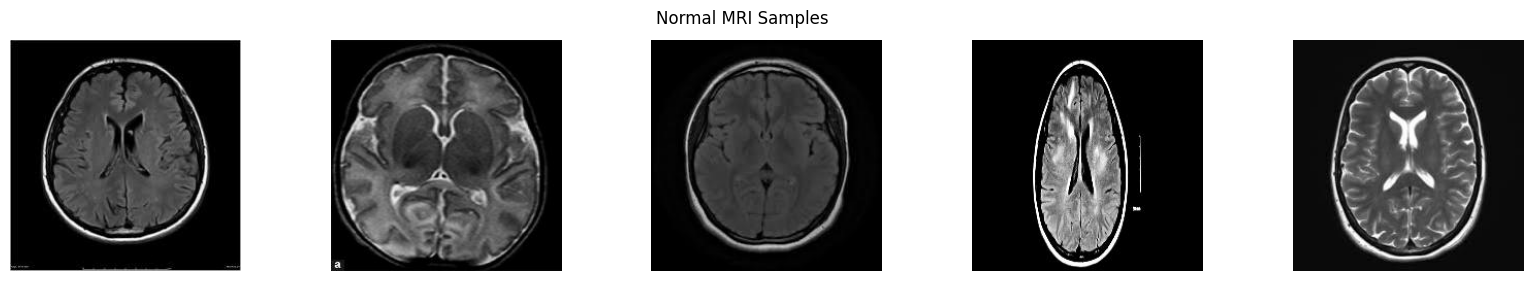

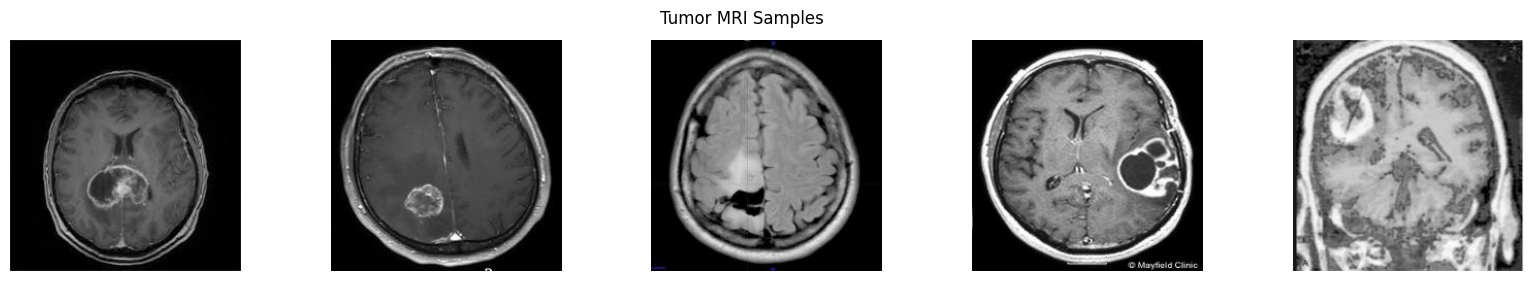

In [ ]:
def display_images(filepaths, title, num_images=5):
    plt.figure(figsize=(20, 3))
    plt.suptitle(title)
    for i in range(num_images):
        img_path = random.choice(filepaths)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

display_images(normal_files, "Normal MRI Samples")
display_images(tumor_files, "Tumor MRI Samples")


VIT


In [ ]:
# ======================================================
# 🔹 Fine-Tuning d'un modèle Vision Transformer (ViT)
# ======================================================

import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Device utilisé :", device)

# ======================================================
# 1️⃣ Charger le modèle ViT pré-entraîné
# ======================================================
vit_model = models.vit_b_16(pretrained=True)

# 🔧 À MODIFIER : Mets ici le nombre de classes de ton dataset
num_classes = 2  # exemple : 2 classes (chat/chien, normal/anormal, etc.)

# Geler les poids du modèle (optionnel)
for param in vit_model.parameters():
    param.requires_grad = False

# Remplacer la dernière couche (tête de classification)
in_features = vit_model.heads.head.in_features
vit_model.heads.head = nn.Linear(in_features, num_classes)

vit_model = vit_model.to(device)
print("✅ Modèle ViT prêt au fine-tuning")

✅ Device utilisé : cpu


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Modèle ViT prêt au fine-tuning


In [ ]:


# ======================================================
# 2️⃣ Définir la perte et l’optimiseur
# ======================================================
criterion = nn.CrossEntropyLoss()

# 🔧 À MODIFIER : tu peux changer le taux d’apprentissage ou débloquer plus de couches
optimizer = torch.optim.Adam(vit_model.heads.head.parameters(), lr=1e-4)

In [ ]:
# ======================================================
# 3️⃣ Préparation des DataLoaders à partir des fichiers
# ======================================================
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from glob import glob
from tqdm import tqdm

# ---- Device ----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Device utilisé :", device)

# ---- Collecte automatique des fichiers et labels ----
def load_split_data(base_dir):
    files = []
    labels = []

    for label_name, label_idx in zip(["Normal", "Tumor"], [0, 1]):
        path = os.path.join(base_dir, label_name)
        for file in glob(os.path.join(path, "*.jpg")):
            files.append(file)
            labels.append(label_idx)
    return files, labels

train_dir = "/content/brain_tumor_dataset_split/train"
val_dir   = "/content/brain_tumor_dataset_split/val"
test_dir  = "/content/brain_tumor_dataset_split/test"

train_files, train_labels = load_split_data(train_dir)
val_files, val_labels     = load_split_data(val_dir)
test_files, test_labels   = load_split_data(test_dir)

print(f"Train: {len(train_files)} | Val: {len(val_files)} | Test: {len(test_files)}")

# ---- Dataset personnalisé ----
class CustomImageDataset(Dataset):
    def __init__(self, filepaths, labels, transform=None):
        self.filepaths = filepaths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.filepaths)

    def __getitem__(self, idx):
        img_path = self.filepaths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# ---- Transformations ----
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

# ---- Création des Datasets ----
train_dataset = CustomImageDataset(train_files, train_labels, transform=transform)
val_dataset   = CustomImageDataset(val_files, val_labels, transform=transform)
test_dataset  = CustomImageDataset(test_files, test_labels, transform=transform)

# ---- DataLoaders ----
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print("✅ DataLoaders créés avec succès :")
print(f"- Entraînement : {len(train_dataset)} images")
print(f"- Validation   : {len(val_dataset)} images")
print(f"- Test         : {len(test_dataset)} images")


✅ Device utilisé : cpu
Train: 123 | Val: 14 | Test: 59
✅ DataLoaders créés avec succès :
- Entraînement : 123 images
- Validation   : 14 images
- Test         : 59 images


In [ ]:
# ======================================================
# 4️⃣ Chargement du modèle ViT pré-entraîné et préparation
# ======================================================
vit_model = models.vit_b_16(pretrained=True)

# 🔧 À MODIFIER : nombre de classes de ton dataset
num_classes = 2  # (Tumor et Normal)

# Geler toutes les couches sauf la tête de classification
for param in vit_model.parameters():
    param.requires_grad = False

# Remplacer la tête du ViT
in_features = vit_model.heads.head.in_features
vit_model.heads.head = nn.Linear(in_features, num_classes)
vit_model = vit_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vit_model.heads.head.parameters(), lr=1e-4)

print("✅ Modèle ViT prêt au fine-tuning")

# ======================================================
# 5️⃣ Entraînement du modèle
# ======================================================
num_epochs = 10  # 🔧 À MODIFIER selon le temps d’entraînement
for epoch in range(num_epochs):
    vit_model.train()
    running_loss = 0.0
    running_corrects = 0

    loop = tqdm(train_loader, desc=f"Époch {epoch+1}/{num_epochs}")
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = vit_model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        loop.set_postfix(loss=loss.item())

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    print(f"🔹 Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}")


✅ Modèle ViT prêt au fine-tuning


Époch 1/10:   0%|          | 0/4 [00:19<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# ======================================================
# 6️⃣ Évaluation du modèle (Accuracy + F1-score + Matrice de confusion)
# ======================================================
import torch
from sklearn.metrics import f1_score, confusion_matrix, classification_report  # ✅ IMPORT added here
import seaborn as sns # ✅ IMPORT added here

vit_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vit_model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# ---- Calcul des métriques ----
acc = (torch.tensor(y_true) == torch.tensor(y_pred)).sum().item() / len(y_true)
f1 = f1_score(y_true, y_pred, average='macro')  # 🔧 "macro" car classes équilibrées ou non
print(f"✅ Accuracy : {acc*100:.2f}%")
print(f"✅ F1-score : {f1:.4f}")

# ---- Matrice de confusion ----
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Tumor"],
            yticklabels=["Normal", "Tumor"])
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.title("Matrice de confusion - ViT")
plt.show()

# ---- Rapport détaillé ----
print("\n🔎 Rapport de classification :")
print(classification_report(y_true, y_pred, target_names=["Normal", "Tumor"]))

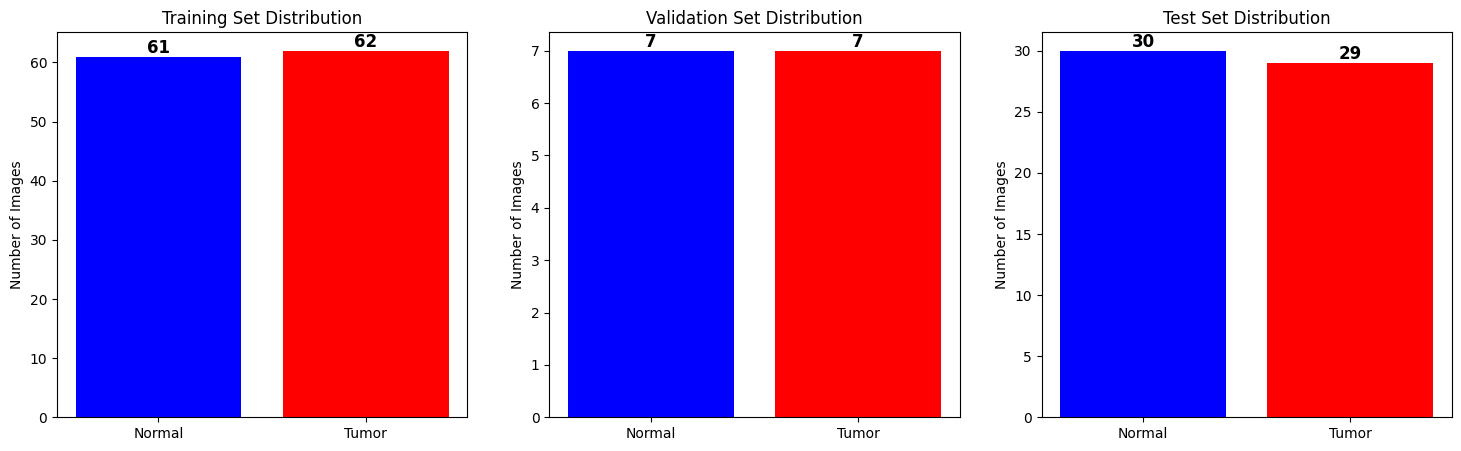

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert labels to NumPy array for easier processing
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

# Count the occurrences of each class (assuming 0 = Normal, 1 = Tumor)
train_counts = np.bincount(train_labels)
test_counts = np.bincount(test_labels)
val_counts = np.bincount(val_labels)


# Define class names
class_names = ["Normal", "Tumor"]

# Plot histogram
fig, ax = plt.subplots(1, 3, figsize=(18, 5)) # Adjusted for 3 subplots (train, val, test)

# Training set histogram
bars_train = ax[0].bar(class_names, train_counts, color=['blue', 'red'])
ax[0].set_title("Training Set Distribution")
ax[0].set_ylabel("Number of Images")

# Validation set histogram
bars_val = ax[1].bar(class_names, val_counts, color=['blue', 'red'])
ax[1].set_title("Validation Set Distribution")
ax[1].set_ylabel("Number of Images")

# Test set histogram
bars_test = ax[2].bar(class_names, test_counts, color=['blue', 'red'])
ax[2].set_title("Test Set Distribution")
ax[2].set_ylabel("Number of Images")


# Add labels on top of the bars
for bar in bars_train:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
               ha='center', va='bottom', fontsize=12, fontweight='bold')

for bar in bars_val:
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
               ha='center', va='bottom', fontsize=12, fontweight='bold')

for bar in bars_test:
    ax[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
               ha='center', va='bottom', fontsize=12, fontweight='bold')


plt.show()

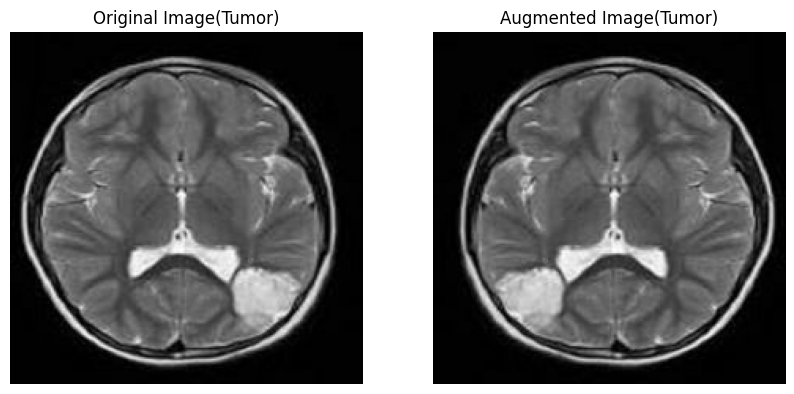

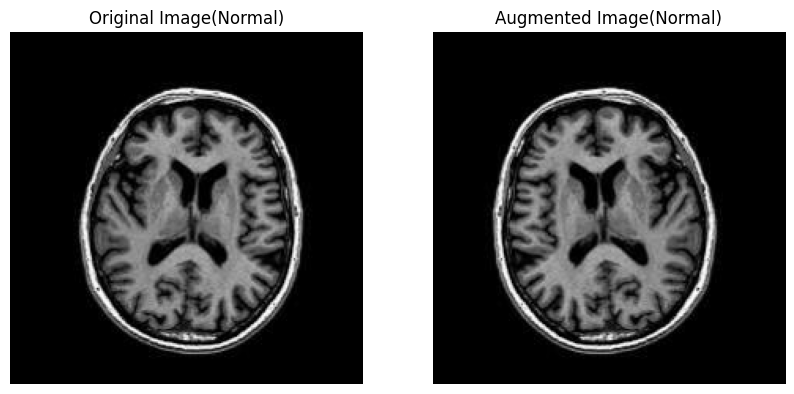

In [ ]:
# Random horizontal flip
# Update image paths for the new dataset
image_path1 = random.choice([f for f in train_files if 'Tumor' in f]) # Select a random Tumor image from train_files
image1 = tf.io.read_file(image_path1)  # Read the image file
image1 = tf.image.decode_jpeg(image1, channels=3)  # Decode the image into a tensor
left_right1 = tf.image.random_flip_left_right(image1)

image_path2 = random.choice([f for f in train_files if 'Normal' in f]) # Select a random Normal image from train_files
image2 = tf.io.read_file(image_path2)  # Read the image file
image2 = tf.image.decode_jpeg(image2, channels=3)  # Decode the image into a tensor
left_right2 = tf.image.random_flip_left_right(image2)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(Tumor)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(left_right1.numpy().astype(int))  # Display rot1 instead of rot
plt.title('Augmented Image(Tumor)')
plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(Normal)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(left_right2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Augmented Image(Normal)')
plt.axis('off')

plt.show()

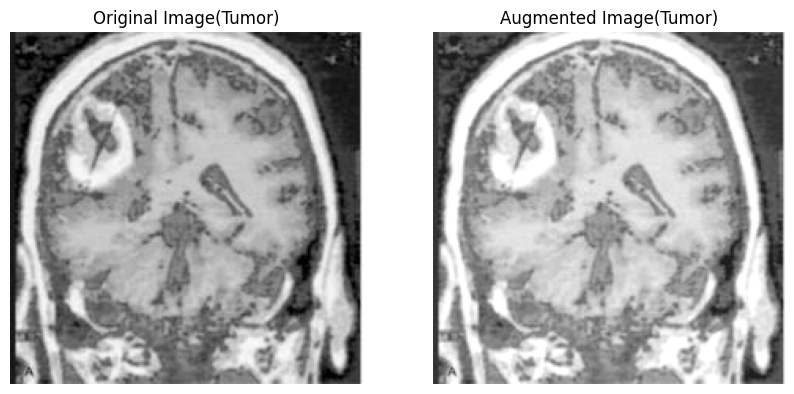

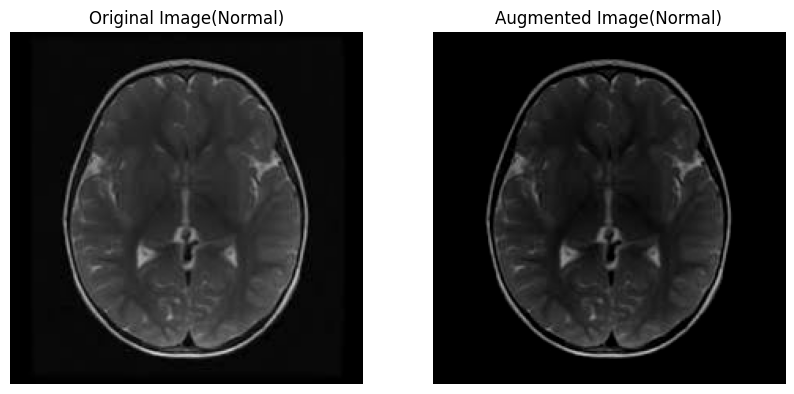

In [ ]:
# Brightness modification
# Update image paths for the new dataset
image_path1 = random.choice([f for f in train_files if 'Tumor' in f]) # Select a random Tumor image from train_files
image1 = tf.io.read_file(image_path1)  # Read the image file
image1 = tf.image.decode_jpeg(image1, channels=3)  # Decode the image into a tensor
bright1 = tf.image.random_brightness(image1, max_delta=0.2)

image_path2 = random.choice([f for f in train_files if 'Normal' in f]) # Select a random Normal image from train_files
image2 = tf.io.read_file(image_path2)  # Read the image file
image2 = tf.image.decode_jpeg(image2, channels=3)  # Decode the image into a tensor
bright2 = tf.image.random_brightness(image2, max_delta=0.2)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(Tumor)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bright1.numpy().astype(int))  # Display rot1 instead of rot
plt.title('Augmented Image(Tumor)')
plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(Normal)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bright2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Augmented Image(Normal)')
plt.axis('off')

plt.show()

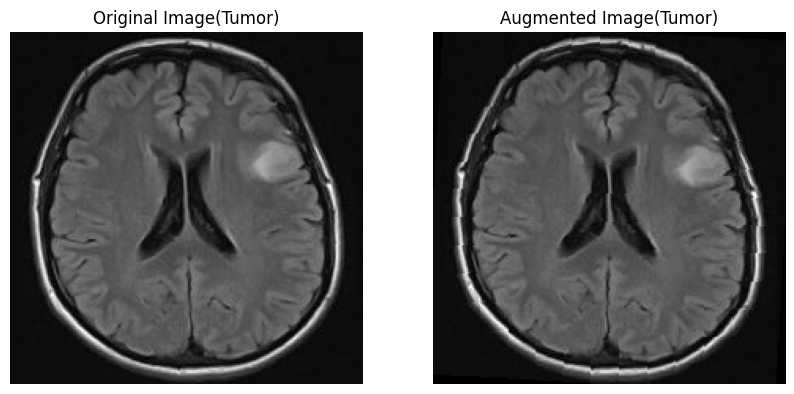

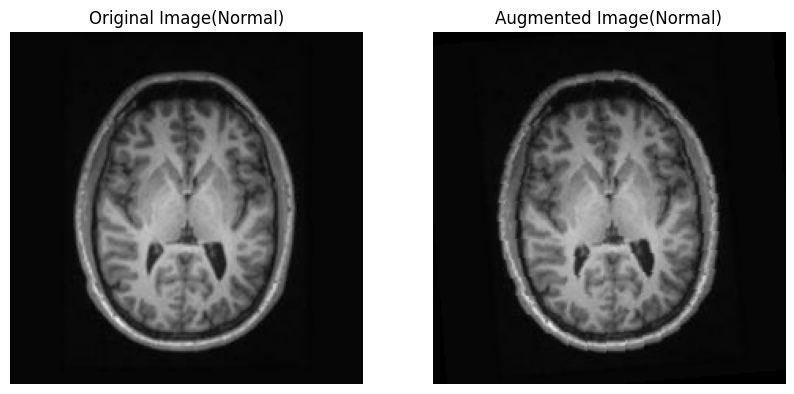

In [ ]:
# Rotation
# Update image paths for the new dataset
image_path1 = random.choice([f for f in train_files if 'Tumor' in f]) # Select a random Tumor image from train_files
image1 = tf.io.read_file(image_path1)  # Read the image file
image1 = tf.image.decode_jpeg(image1, channels=3)  # Decode the image into a tensor
angles = tf.random.uniform(shape=[], minval=-0.2, maxval=0.2)  # Rotation between -15° and 15° (in radians)
rot1 = tfa.image.rotate(image1, angles)

image_path2 = random.choice([f for f in train_files if 'Normal' in f]) # Select a random Normal image from train_files
image2 = tf.io.read_file(image_path2)  # Read the image file
image2 = tf.image.decode_jpeg(image2, channels=3)  # Decode the image into a tensor
angles = tf.random.uniform(shape=[], minval=-0.2, maxval=0.2)  # Rotation between -10° and 10° (in radians)
rot2 = tfa.image.rotate(image2, angles)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(Tumor)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rot1.numpy().astype(int))  # Display rot1 instead of rot
plt.title('Augmented Image(Tumor)')
plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(Normal)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rot2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Augmented Image(Normal)')
plt.axis('off')

plt.show()

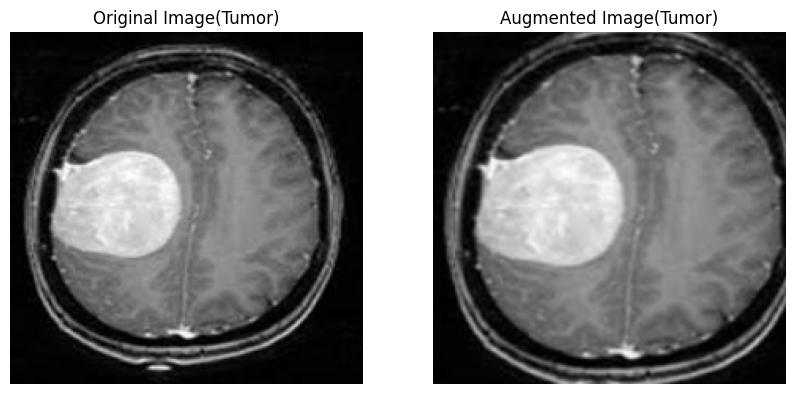

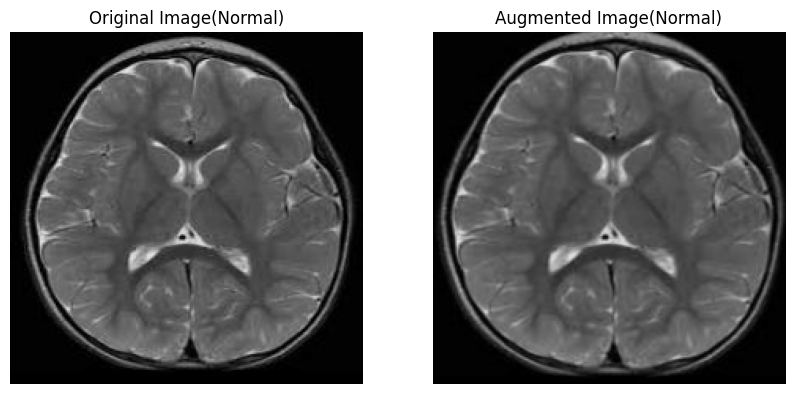

In [ ]:
# Zoom
# Update image paths for the new dataset
image_path1 = random.choice([f for f in train_files if 'Tumor' in f]) # Select a random Tumor image from train_files
image1 = tf.io.read_file(image_path1)  # Read the image file
image1 = tf.image.decode_jpeg(image1, channels=3)  # Decode the image into a tensor
zoom_factor = tf.random.uniform(shape=[], minval=1.0, maxval=1.2)
original_shape = tf.shape(image1)
new_shape = tf.cast(tf.cast(original_shape[:2], tf.float32) * zoom_factor, tf.int32) # Select only height and width
image11 = tf.image.resize(image1, new_shape)
image12 = tf.image.random_crop(image11, original_shape)

image_path2 = random.choice([f for f in train_files if 'Normal' in f]) # Select a random Normal image from train_files
image2 = tf.io.read_file(image_path2)  # Read the image file
image2 = tf.image.decode_jpeg(image2, channels=3)  # Decode the image into a tensor
zoom_factor = tf.random.uniform(shape=[], minval=1.0, maxval=1.2)
original_shape = tf.shape(image2)
new_shape = tf.cast(tf.cast(original_shape[:2], tf.float32) * zoom_factor, tf.int32) # Select only height and width
image22 = tf.image.resize(image2, new_shape)
image13 = tf.image.random_crop(image22, original_shape)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(Tumor)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image12.numpy().astype(int))  # Display rot1 instead of rot
plt.title('Augmented Image(Tumor)')
plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(Normal)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image13.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Augmented Image(Normal)')
plt.axis('off')

plt.show()

Ce code crée des datasets TensorFlow à partir de chemins d’images et de labels, en appliquant un prétraitement, une normalisation, et éventuellement des augmentations (rotation, flip, luminosité, zoom), puis les prépare pour l’entraînement avec batching et préchargement.

In [ ]:
def create_dataset(filepaths, labels, batch_size=32, augment=False):
    def load_and_preprocess_image(filepath, label):
        try:
            image = tf.io.read_file(filepath)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, [224, 224])
            image = image / 255.0  # Normalization
            return image, label
        except tf.errors.InvalidArgumentError:
            # Handle cases where image decoding fails
            print(f"Skipping invalid image file: {filepath.numpy()}")
            return tf.constant([], dtype=tf.float32), tf.constant([], dtype=tf.int32) # Return empty tensors

    dataset = tf.data.Dataset.from_tensor_slices((filepaths, labels))
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.filter(lambda image, label: tf.size(image) > 0) # Filter out empty tensors


    if augment:
        def augment_image(image, label):
            angles = tf.random.uniform(shape=[], minval=-0.2, maxval=0.2)
            image = tfa.image.rotate(image, angles)
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_brightness(image, max_delta=0.2)
            # Zoom (20% zoom in)
            zoom_factor = tf.random.uniform(shape=[], minval=1.0, maxval=1.2)
            original_shape = tf.shape(image)
            new_shape = tf.cast(tf.cast(original_shape[:2], tf.float32) * zoom_factor, tf.int32) # Select only height and width
            image = tf.image.resize(image, new_shape)
            image = tf.image.random_crop(image, original_shape)
            image = tf.clip_by_value(image, 0.0, 1.0)
            # Return the image and label, regardless of augmentation
            return image, label
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)


    dataset = dataset.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create the datasets
train_dataset = create_dataset(train_files, train_labels, augment=True)
test_dataset = create_dataset(test_files, test_labels)
val_dataset = create_dataset(val_files, val_labels)

Ce code affiche un batch de jusqu’à 9 images du dataset d’entraînement avec leurs labels correspondants, montrant les images après augmentation.

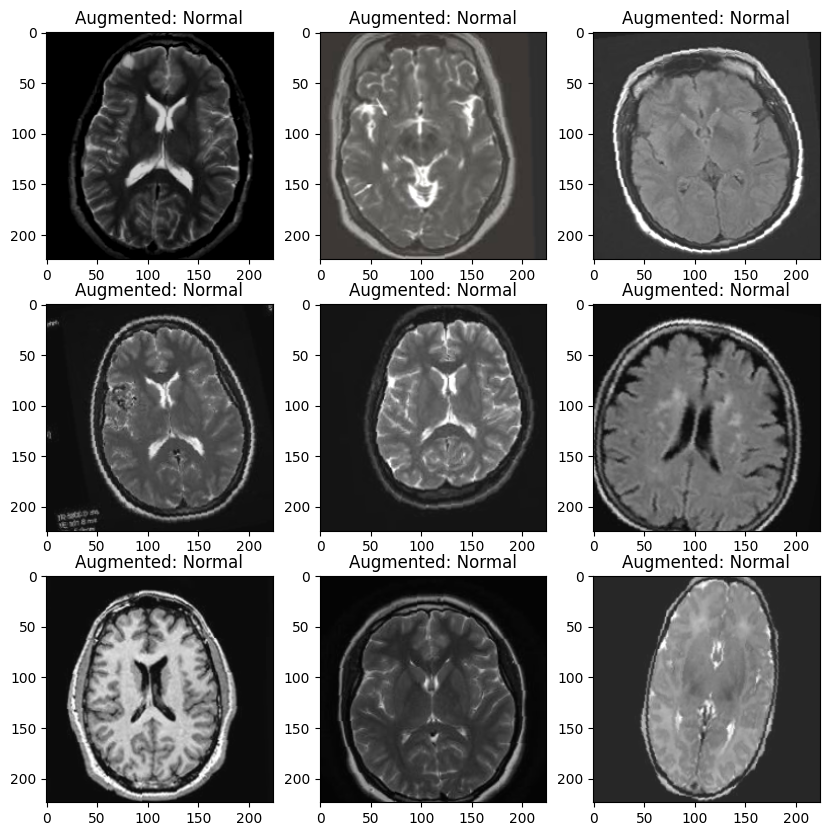

In [ ]:
import matplotlib.pyplot as plt

# Label dictionary for the new dataset
label_dict = {0: "Normal", 1: "Tumor"}

# Take a batch of images from the dataset
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):  # Display up to 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Augmented: {label_dict[labels[i].numpy()]}")
        plt.axis("on")
    plt.show()

Ce code crée un modèle de classification binaire basé sur VGG19 pré-entraîné, avec des couches personnalisées et un fine-tuning partiel, puis le compile pour l’entraînement avec l’optimizer Adam et la perte binaire

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load a pre-trained model (VGG19)
base_model = VGG19(include_top=False, input_shape=(224,224,3), weights='imagenet')

# Fine-tune the last 15 layers (increased from 10)
for layer in base_model.layers[:-15]: # Increased trainable layers
    layer.trainable = False
for layer in base_model.layers[-15:]: # Increased trainable layers
    layer.trainable = True

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x) # Binary output for Tumor/Normal

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
# You might experiment with different learning rates for better performance
model.compile(optimizer=Adam(learning_rate=1e-5), # Adjusted learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,155,969 (76.89 MB)

 Trainable params: 19,895,809 (75.90 MB)

 Non-trainable params: 260,160 (1016.25 KB)

In [ ]:
for layer in model.layers:
   print(layer, layer.trainable== True)

<InputLayer name=input_layer, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> True
<Conv2D name=block3_conv2, built=True> True
<Conv2D name=block3_conv3, built=True> True
<Conv2D name=block3_conv4, built=True> True
<MaxPooling2D name=block3_pool, built=True> True
<Conv2D name=block4_conv1, built=True> True
<Conv2D name=block4_conv2, built=True> True
<Conv2D name=block4_conv3, built=True> True
<Conv2D name=block4_conv4, built=True> True
<MaxPooling2D name=block4_pool, built=True> True
<Conv2D name=block5_conv1, built=True> True
<Conv2D name=block5_conv2, built=True> True
<Conv2D name=block5_conv3, built=True> True
<Conv2D name=block5_conv4, built=True> True
<MaxPooling2D name=block5_pool, built=True> Tr

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=15,              # Stop after 15 epochs without improvement (increased patience)
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_modelVGG19_brain_tumor.keras', # Save the best model with a new name
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model
# You might experiment with the number of epochs
history = model.fit(
    train_dataset,           # Training dataset
    validation_data=val_dataset,  # Validation dataset
    epochs=50,               # Maximum 50 epochs (increased)
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/50
      4/Unknown 247s 57s/step - accuracy: 0.3961 - loss: 0.8910

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 1: val_loss improved from inf to 0.71282, saving model to best_modelVGG19_brain_tumor.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 258s 61s/step - accuracy: 0.4014 - loss: 0.8868 - val_accuracy: 0.5000 - val_loss: 0.7128
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58s/step - accuracy: 0.5825 - loss: 0.6647  
Epoch 2: val_loss improved from 0.71282 to 0.70002, saving model to best_modelVGG19_brain_tumor.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 244s 61s/step - accuracy: 0.5684 - loss: 0.6816 - val_accuracy: 0.5000 - val_loss: 0.7000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56s/step - accuracy: 0.5375 - loss: 0.7152 
Epoch 3: val_loss improved from 0.70002 to 0.68876, saving model to best_modelVGG19_brain_tumor.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 258s 60s/step - accuracy: 0.5308 - loss: 0.7240 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58s/step - accuracy: 0.5332 - loss: 0.7204 
Epoch 4: val_loss improved from 0.68876 to 0.67905, saving model to best_modelVGG19_brain_tumor.keras


recharger le modèle Keras

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_modelVGG19_brain_tumor.keras') # Load the model with the new name

# Check the model summary
model.summary()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Model predictions (probabilities)
y_pred_prob = model.predict(test_dataset)
# Convert to binary labels
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # 0.5 threshold for binary

# Get true labels
y_true = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)
y_true = y_true.flatten()  # ensure it's 1D

# Classification report
print(classification_report(y_true, y_pred, digits=4, target_names=["Normal", "Tumor"]))

# Global metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Binary predictions
y_pred = (model.predict(test_dataset) > 0.5).astype(int).flatten()

# True labels
y_true = np.concatenate([y.numpy() for _, y in test_dataset], axis=0).flatten()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display with seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("best_modelVGG19_brain_tumor.keras")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Application de XAI

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import random # Import the random module

# Charger le modèle
model = load_model('/content/best_modelVGG19_brain_tumor.keras') # Updated model path

# Charger et préparer l'image
# Update image path for the new dataset
img_path = random.choice([f for f in test_files if 'Tumor' in f]) # Select a random Tumor image from test_files
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Sélectionner la dernière couche convolutionnelle
last_conv_layer = model.get_layer('block5_conv4')

# Créer un modèle pour Grad-CAM
grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

# Calcul des gradients
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    # For binary classification with sigmoid, we want the gradient of the output for the positive class (Tumor)
    pred_index = 0 # The output is a single value between 0 and 1, representing the probability of the positive class (Tumor)
    class_channel = predictions[:, pred_index]

grads = tape.gradient(class_channel, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Normaliser la carte de chaleur
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = heatmap.numpy()

# Charger l'image originale (non redimensionnée)
orig = cv2.imread(img_path)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

# Redimensionner le heatmap à la taille de l'image originale
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))

# Appliquer la colormap
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superposer heatmap et image originale
superposed_img = cv2.addWeighted(orig, 0.6, heatmap, 0.4, 0)

# Afficher
plt.figure(figsize=(8, 8))
plt.imshow(superposed_img)
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import random # Import the random module

# Charger le modèle
model = load_model('/content/best_modelVGG19_brain_tumor.keras') # Updated model path

# Charger et préparer l'image
# Update image path for the new dataset
img_path = random.choice([f for f in test_files if 'Tumor' in f]) # Select a random Tumor image from test_files
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Prédiction du modèle
predictions = model.predict(img_array)
# For binary classification with sigmoid, the output is a single value.
# We can interpret it as the probability of the positive class (Tumor).
# If the probability is > 0.5, predict Tumor (1), otherwise Normal (0).
predicted_class_index = (predictions[0] > 0.5).astype(int)[0]


# Define class names for the new dataset
class_names = ['Normal', 'Tumor']
pred_class = class_names[predicted_class_index]

print(f"Classe prédite : {pred_class}")
print(f"Probabilité de tumeur : {predictions[0][0]:.4f}")


# Sélectionner la dernière couche conv
last_conv_layer = model.get_layer('block5_conv4')

grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

# Calcul Grad-CAM
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    # For binary classification with sigmoid, we want the gradient of the output for the positive class (Tumor)
    class_channel = predictions[:, 0] # Use the output for the positive class (index 0 since it's a single value)


grads = tape.gradient(class_channel, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Normalisation
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = heatmap.numpy()

# Charger l'image originale
orig = cv2.imread(img_path)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

# Redimensionner et fusionner la heatmap
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superposed_img = cv2.addWeighted(orig, 0.6, heatmap, 0.4, 0)

# Afficher l'image avec la prédiction
plt.figure(figsize=(8, 8))
plt.imshow(superposed_img)
plt.title(f"Prédiction : {pred_class}")
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
files.download('/content/best_modelVGG19_brain_tumor.keras')